## The San Francisco Chronicle

For the purpose of this analysis, we'll scrape text from [The San Francisco Chronicle](https://www.sfchronicle.com/) newspaper and then analyze the text.

The Chronicle is organized by category into article lists. For example, there's a [Local](https://www.sfchronicle.com/local/) list, [Sports](https://www.sfchronicle.com/sports/) list, and [Food](https://www.sfchronicle.com/food/) list.

Note -- All relevant functions / documentation exist in the .py file

In [1]:
# import relevant function
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import requests
import requests_cache

import lxml.html as lx

import nltk
import nltk.corpus
import re

from hw4 import *

requests_cache.install_cache("hw4cache")

We begin by creating and testing a function that grabs all article links from the specified SF Chronicle category listing. 

In [2]:
url_local = 'https://www.sfchronicle.com/local/'
url_biz = 'https://www.sfchronicle.com/business/'

links_local = get_articles(url_local)
links_biz = get_articles(url_biz)

for x, y in zip(links_local[:2], links_biz[:2]):
    print('Biz+Tech: {}\nLocal: {}'.format(y, x), end='\n\n')

Biz+Tech: https://www.sfchronicle.com/business/article/Huawei-makes-global-marketing-push-amid-13614739.php
Local: https://www.sfchronicle.com/bayarea/article/Multiple-sclerosis-changed-their-lives-But-this-13489627.php

Biz+Tech: https://www.sfchronicle.com/business/article/Activision-Blizzard-to-lay-off-800-workers-13614829.php
Local: https://www.sfchronicle.com/bayarea/heatherknight/article/SF-General-pauses-some-exorbitant-bills-but-13618485.php



Next, we write a function that extracts the relevant information from our scraped articles (date, author, title, text). We return the information in a dictionary with the keys being the associated information key. 

In [3]:
pol_url = 'https://www.sfchronicle.com/politics/article/Both-House-leaders-from-California-but-they-13557134.php'
biz_url = 'https://www.sfchronicle.com/business/article/92-year-old-SF-tower-sold-for-227-million-13617687.php'
loc_url = 'https://www.sfchronicle.com/bayarea/article/CleanPowerSF-tripling-households-served-with-13618155.php'

pol_dict = get_data(pol_url)
biz_dict = get_data(biz_url)
loc_dict = get_data(loc_url)

#print(loc_dict)
#print(pol_dict)
#print(biz_dict)

We create a data frame with all our informtion from steps 1 and 2. The data frame will consist of 7 columns, with the text column being the most important as this will make up our corpus for the NLP analysis in step 4.

In [4]:
local_url = 'https://www.sfchronicle.com/local/'
biz_url = 'https://www.sfchronicle.com/business/'
pol_url = 'https://www.sfchronicle.com/elections/'

df_local = scrape_chronicle(local_url)
df_biz = scrape_chronicle(biz_url)
df_pol = scrape_chronicle(pol_url)

# combine the category df's into a giant df of all three categories
df = df_local.merge(df_biz, how='outer')
df = df.merge(df_pol, how='outer')

In [5]:
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 236
Data columns (total 7 columns):
author          235 non-null object
category        237 non-null object
date            237 non-null datetime64[ns]
date updated    222 non-null datetime64[ns]
text            237 non-null object
title           237 non-null object
url             237 non-null object
dtypes: datetime64[ns](2), object(5)
memory usage: 14.8+ KB
None


,author,category,date,date updated,text,title,url
0,Kevin Fagan,local,2018-12-25,2018-12-25,"Many years ago, when his body was strong and ...",Multiple sclerosis changed their lives. But th...,https://www.sfchronicle.com/bayarea/article/Mu...
1,Heather Knight,local,2019-02-15,2019-02-16,Zander Brandt keeps getting jolted awake. Fir...,"SF General pauses exorbitant bills, but cancel...",https://www.sfchronicle.com/bayarea/heatherkni...
2,Dominic Fracassa,local,2019-01-26,2019-01-26,Even though Mayor “When federal workers are f...,Government reopen — for now — but SF still pla...,https://www.sfchronicle.com/bayarea/article/Go...


Finally, we look at word combinatinos to get an idea of what Chronicle writers were talking about. We use basic tools from natural language toolkit (nltk). We refrain from using any of Scikit-Learn's Feature Engineering related to NLP for the purposes of this analysis, though future notebooks will most likely explore. 

We look at the word frequency of the SF Chronicle's Business, Politics, and Local categories. We begin by looking at the most common bigrams for each category. We then recompute the frequency for single words, and also compute the relative frequency of occurrences (how often does a word show up relative to total words in a category). In all of the following, we sort values and look at the most common words used (generally top 10-20). 


The [nltk book](http://www.nltk.org/book/) 

In [6]:
# words we will parse out of our dataframe
stopwords = nltk.corpus.stopwords.words("english") + ['0','1','2','3','4','5','6','7','8','9']

# split main data frame into frame's based off of category
biz = df[df['category'] == 'business']['text']
loc = df[df['category'] == 'local']['text']
pol = df[df['category'] == 'elections']['text']

# find frequency count for each category, here we choose to analyze bigrams but we 
# could change to single words by changing parameters
biz_freq = pd.DataFrame([freq_dist(doc, stopwords, ng=2) for doc in biz]).fillna(0)
loc_freq = pd.DataFrame([freq_dist(doc, stopwords, ng=2) for doc in loc]).fillna(0)
pol_freq = pd.DataFrame([freq_dist(doc, stopwords, ng=2) for doc in pol]).fillna(0)

# create one giant string for each category, will be used for the line graph
biz_string = df_biz['text'].str.cat()
loc_string = df_local['text'].str.cat()
pol_string = df_pol['text'].str.cat()

We first analyze the business category of the SF Chronicle. We'd expect our top two results, as SF is the local hub and NY is the countries business hub. From there, S&P 500, insider trading, per barrel, and asset fund gives us an idea of the topics that may be more heavily featured at this current moment.

(san, francisco)      28.0
(new, york)           19.0
(per, barrel)         12.0
(last, year)          12.0
(asset, fund)          9.0
(mission, asset)       9.0
(uc, berkeley)         8.0
(insider, trading)     7.0
(trade, talks)         7.0
(s&p, 500)             7.0
dtype: float64


[Text(0, 0, '(new, york)'),
 Text(0, 0, '(mission, asset)'),
 Text(0, 0, '(insider, trading)'),
 Text(0, 0, '(share, classes)'),
 Text(0, 0, '(short, term)'),
 Text(0, 0, '')]

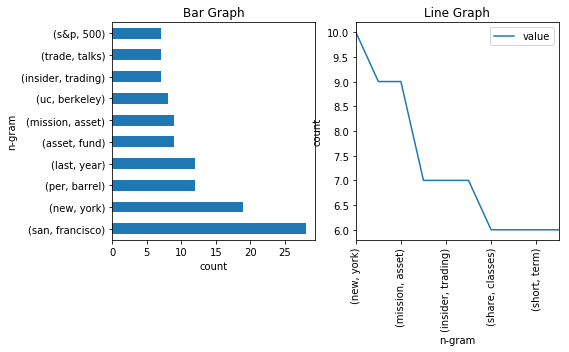

In [7]:
b1 = biz_freq.sum(axis=0).sort_values(ascending=False)[:10]
b2 = biz_freq.melt().sort_values(by='value', ascending=False)[:10]

print(b1)

fig, axes = plt.subplots(1,2)

b1.plot(kind='barh',ax=axes[0], figsize = (8,4))
axes[0].set_title('Bar Graph')
axes[0].set_xlabel('count')
axes[0].set_ylabel('n-gram')

b2.plot(x='variable',y='value',ax=axes[1])
axes[1].set_title('Line Graph')
axes[1].set_xlabel('n-gram')
axes[1].set_ylabel('count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 90)

Next, we look at the local category. We're not given as much as we were for business, but mental health and f general (SF general perhaps) may lead us to believe that health related topics are being discussed. We could expect that the other terms that come up frequently are related to locations around the area. 

(san, francisco)     124.0
(season, sharing)     36.0
(bay, area)           33.0
(coffey, park)        31.0
(santa, rosa)         25.0
(mental, health)      24.0
(year, old)           24.0
(f, general)          22.0
(san, jose)           19.0
(last, year)          18.0
dtype: float64


[Text(0, 0, '(rainbow, sign)'),
 Text(0, 0, '(willie, mccoy)'),
 Text(0, 0, '(santa, rosa)'),
 Text(0, 0, '(coffey, park)'),
 Text(0, 0, '(asset, fund)'),
 Text(0, 0, '')]

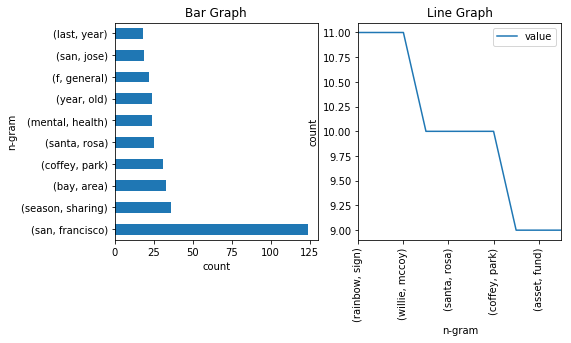

In [8]:
l1 = loc_freq.sum(axis=0).sort_values(ascending=False)[:10]
l2 = loc_freq.melt().sort_values(by='value', ascending=False)[:10]

print(l1)

fig, axes = plt.subplots(1,2)

l1.plot(kind='barh',ax=axes[0], figsize = (8,4))
axes[0].set_title('Bar Graph')
axes[0].set_xlabel('count')
axes[0].set_ylabel('n-gram')

l2.plot(x='variable',y='value',ax=axes[1])
axes[1].set_title('Line Graph')
axes[1].set_xlabel('n-gram')
axes[1].set_ylabel('count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 90)

Finally, we look at politics. It seems that a significant amount of the discussion is revolving around the President's recent announcement of a national emergency to fund his border wall (sensical as he's proposed to take Federal money from CA to fund) as well as mentions of prevelant CA political figures, with Kamala Harris especially since she just announced her candidacy for president. 

(san, francisco)         229.0
(newsom, said)            49.0
(white, house)            46.0
(gavin, newsom)           41.0
(president, trump)        41.0
(board, supervisors)      38.0
(national, emergency)     34.0
(los, angeles)            33.0
(affordable, housing)     32.0
(kamala, harris)          31.0
dtype: float64


[Text(0, 0, '(brown, said)'),
 Text(0, 0, '(san, francisco)'),
 Text(0, 0, '(baker, said)'),
 Text(0, 0, '(state, water)'),
 Text(0, 0, '(breed, said)'),
 Text(0, 0, '')]

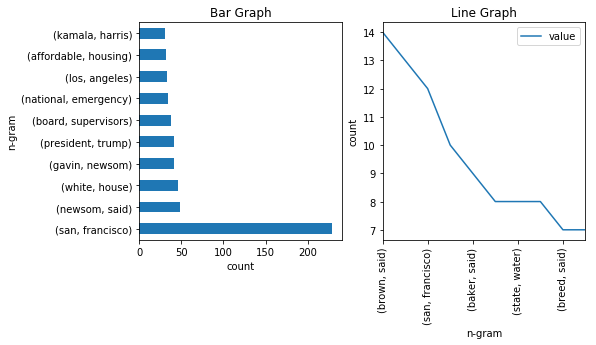

In [9]:
p1 = pol_freq.sum(axis=0).sort_values(ascending=False)[:10]
p2 = pol_freq.melt().sort_values(by='value', ascending=False)[:10]

print(p1)

fig, axes = plt.subplots(1,2)

p1.plot(kind='barh',ax=axes[0], figsize = (8,4))
axes[0].set_title('Bar Graph')
axes[0].set_xlabel('count')
axes[0].set_ylabel('n-gram')

p2.plot(x='variable',y='value',ax=axes[1])
axes[1].set_title('Line Graph')
axes[1].set_xlabel('n-gram')
axes[1].set_ylabel('count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 90)

We then turn to analyzing single words in our corpus

Text(0.5, 1.0, 'Frequency Count by Category: 2-gram')

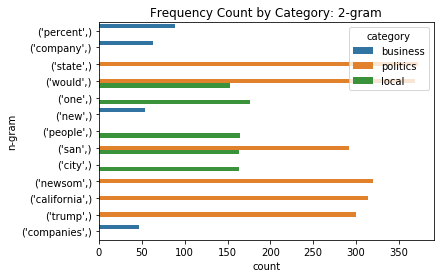

In [10]:
# here, we redo a lot of the word we did at the beginning of 1.4, except only analyzing 1 word
# instead of 2. 

stopwords = stopwords + ['said']

biz_freq = pd.DataFrame([freq_dist(doc, stopwords, ng=1) for doc in biz]).fillna(0)
pol_freq = pd.DataFrame([freq_dist(doc, stopwords, ng=1) for doc in pol]).fillna(0)
loc_freq = pd.DataFrame([freq_dist(doc, stopwords, ng=1) for doc in loc]).fillna(0)

db = comp_rel_freq(biz_freq, biz_string, 'business')
dp = comp_rel_freq(pol_freq, pol_string, 'politics')
dl = comp_rel_freq(loc_freq, loc_string, 'local')

df = db.merge(dp, how='outer')
df = df.merge(dl, how='outer')
df = df.sort_values(by='relative', ascending=False)

output = df.sort_values(by='relative', ascending=False).set_index(['category','n-gram'])[:20]

ax = sns.barplot(y = 'n-gram',x='count',hue='category', data=df[:15])
ax.set_title('Frequency Count by Category: 2-gram')

                        count  relative
category n-gram                        
business (percent,)      89.0  0.182211
         (company,)      63.0  0.128981
politics (state,)       372.0  0.124711
         (would,)       369.0  0.123705
local    (one,)         176.0  0.116457
business (new,)          54.0  0.110555
local    (people,)      164.0  0.108517
         (san,)         163.0  0.107855
         (city,)        163.0  0.107855
politics (newsom,)      320.0  0.107278
         (california,)  314.0  0.105267
local    (would,)       153.0  0.101238
politics (trump,)       300.0  0.100573
         (san,)         292.0  0.097891
business (companies,)    47.0  0.096224
         (data,)         47.0  0.096224
politics (city,)        272.0  0.091186
local    (like,)        137.0  0.090651
business (u,)            44.0  0.090082
         (pg&e,)         41.0  0.083940


Text(0.5, 1.0, 'Frequency Count Across Categories: 1-gram')

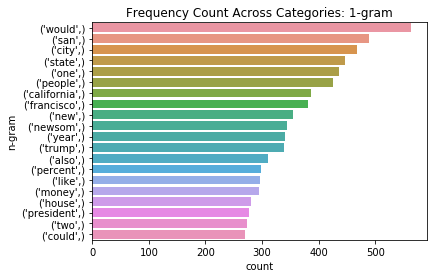

In [11]:
df = df.set_index('category')
x = df.groupby(['n-gram']).sum(axis=1)
x = x.sort_values(by='count', ascending=False)[:20].reset_index()

print(output)

ax = sns.barplot(x='count',y='n-gram',data=x)
ax.set_title('Frequency Count Across Categories: 1-gram')

Computing the relative frequencies gives us a better idea of word importance (without using any of sci-kit learn FE). We can see how words we'd associate with each category are more prominently featured. For business, this is company, for politics it's state, and local seems to have city and san, possible indicating someone was discussing the local cities around the Bay Area. 